In [1]:
%matplotlib inline
import matplotlib
from matplotlib.font_manager import FontProperties
matplotlib.rcParams['text.latex.preamble'] = r'\usepackage{amsmath} \usepackage{amssymb}'
from matplotlib import rc
rc('text', usetex=True)

from tqdm import tqdm

from PETITE.ryan_shower import Shower
from PETITE.particle import *
from PETITE.shower import Shower as OldShower

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.font_manager import FontProperties
from matplotlib.ticker import FixedLocator

font0 = FontProperties()
font = font0.copy()
font.set_size(24)
font.set_family('serif')
labelfont=font0.copy()
labelfont.set_size(20)
labelfont.set_weight('bold')
legfontBig=font0.copy()
legfontBig.set_size(18)
legfontBig.set_weight('bold')

def set_size(w,h, ax=None):
    """ w, h: width, height in inches """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)

Comparison: Electrons injected with equal energy to graphite using old/new prescription

In [2]:
E0 = 1.0
p0 = Particle(11, E0, 0., 0., np.sqrt(E0**2 - 0.000511**2), 0, 0, 0, 1, 0, 0, 0, -1, 1.)
p0G = Particle(22, E0, 0, 0, E0, 0, 0, 0, 1, 0, 0, 0, -1, 1.)
MinEnergy = 0.800
sGraphite = Shower('/Users/ryanplestid/Documents/GitHub/PETITE/RyanDicts/', 'graphite', MinEnergy)
sGraphiteOld = OldShower('/Users/ryanplestid/Documents/GitHub/PETITE/NBP/', 'graphite', MinEnergy)

In [3]:
sGraphite.Draw_Sample

<bound method Shower.Draw_Sample of <PETITE.ryan_shower.Shower object at 0x106cd8c70>>

In [4]:
nSamp = 1
s0 = np.array([sGraphite.ElecBremSample(p0) for i in range(nSamp)])
s0G = np.array([sGraphite.PhotonSplitSample(p0G) for i in range(nSamp)])

NameError: name 'PPQSq' is not defined

In [ ]:
import cProfile
profile = cProfile.Profile()

In [ ]:
def slowfunction():
    s0 = np.array([sGraphite.ElecBremSample(p0)[1] for i in range(nSamp)])
    return

In [ ]:
profile.runcall(slowfunction)


In [ ]:
import pstats

In [ ]:
ps = pstats.Stats(profile)
ps.print_stats()

In [4]:
s0Old = np.array([sGraphiteOld.ElecBremSample(p0) for i in range(nSamp)])
s0GOld = np.array([sGraphiteOld.PhotonSplitSample(p0G) for i in range(nSamp)])

In [5]:
Es = np.array([s[1].get_p0()[0] for s in s0])
EsOld = np.array([s[1].get_p0()[0] for s in s0Old])
EsE = np.array([s[0].get_p0()[0] for s in s0])
EsEOld = np.array([s[0].get_p0()[0] for s in s0Old])

EsG = np.array([s[1].get_p0()[0] for s in s0G])
EsGOld = np.array([s[1].get_p0()[0] for s in s0GOld])
EsGP = np.array([s[0].get_p0()[0] for s in s0G])
EsGPOld = np.array([s[0].get_p0()[0] for s in s0GOld])

In [6]:
trials = np.array([s[0].get_IDs()[-1] for s in s0])

In [7]:
trials[0:20]

array([10., 29.,  8.,  8., 22., 19., 10.,  7.,  2., 19.,  5., 20.,  4.,
        6.,  4.,  3., 19., 11., 16., 12.])

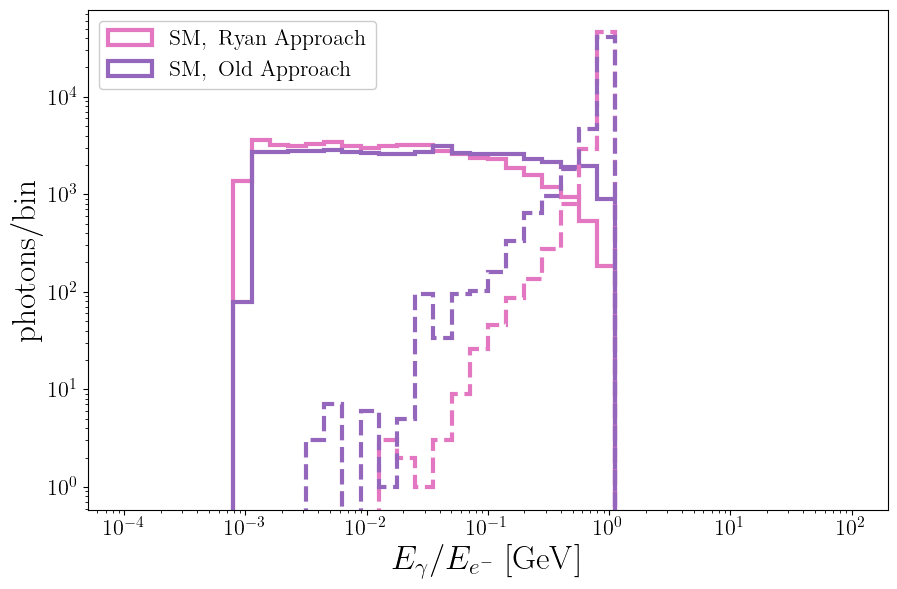

In [8]:
b0 = np.logspace(-4, 2, 41)

plt.hist(Es, bins=b0, histtype='step', lw=3, color='C6', density=False, ls='-', label=r"$\mathrm{SM,\ Ryan\ Approach}$")
plt.hist(EsOld, bins=b0, histtype='step', lw=3, color='C4', ls='-', density=False, label=r"$\mathrm{SM,\ Old\ Approach}$")
plt.hist(EsE, bins=b0, histtype='step', lw=3, color='C6', density=False, ls='--')
plt.hist(EsEOld, bins=b0, histtype='step', lw=3, color='C4', ls='--', density=False)

plt.gca().legend(loc=2, fontsize=16, framealpha=1.0)
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
plt.gca().set_xlabel(r"$E_\gamma/E_{e^-}\ [\mathrm{GeV}]$", fontsize=24)
plt.gca().set_ylabel(r"$\mathrm{photons/bin}$", fontsize=24)
#plt.gca().axis([1e-3,100,1e-11,1e-3])
[l.set_size(16) for l in plt.gca().get_xticklabels()]
[l.set_size(16) for l in plt.gca().get_yticklabels()]

set_size(8.0, 5.0)


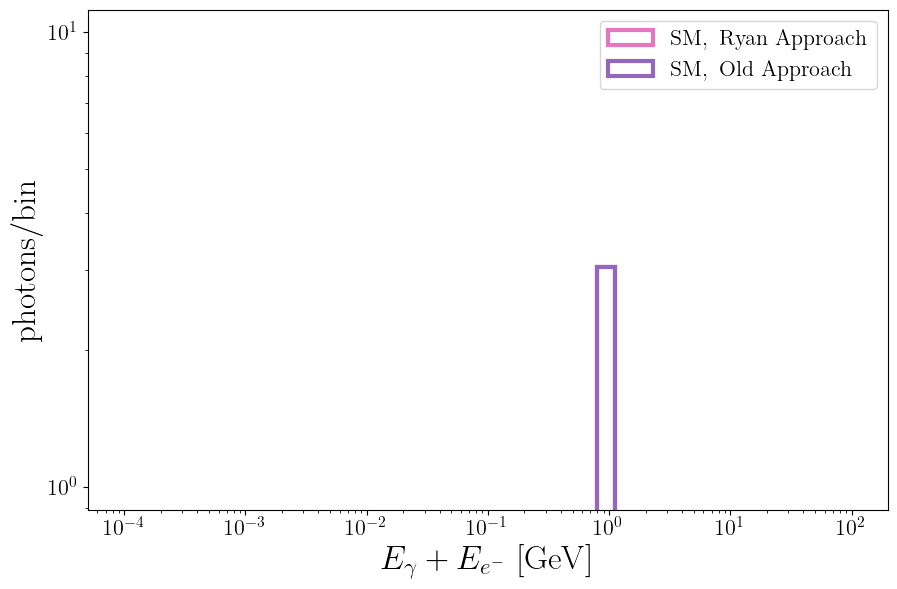

In [9]:
b0 = np.logspace(-4, 2, 41)

plt.hist(Es+EsE, bins=b0, histtype='step', lw=3, color='C6', density=True, ls='-', label=r"$\mathrm{SM,\ Ryan\ Approach}$")
plt.hist(EsOld+EsEOld, bins=b0, histtype='step', lw=3, color='C4', ls='-', density=True, label=r"$\mathrm{SM,\ Old\ Approach}$")

plt.gca().legend(loc=1, fontsize=16)
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
plt.gca().set_xlabel(r"$E_\gamma+E_{e^-}\ [\mathrm{GeV}]$", fontsize=24)
plt.gca().set_ylabel(r"$\mathrm{photons/bin}$", fontsize=24)
#plt.gca().axis([1e-3,100,1e-11,1e-3])
[l.set_size(16) for l in plt.gca().get_xticklabels()]
[l.set_size(16) for l in plt.gca().get_yticklabels()]

set_size(8.0, 5.0)


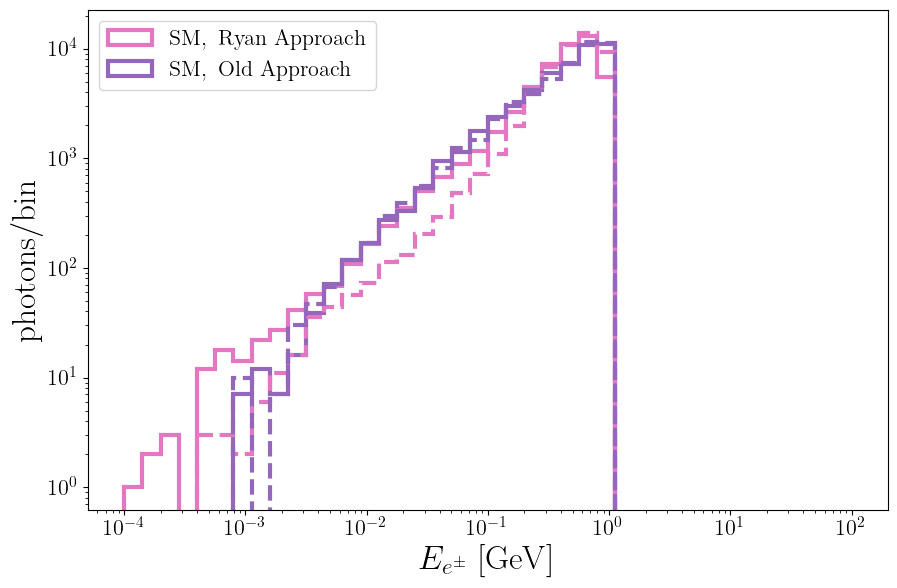

In [10]:
b0 = np.logspace(-4, 2, 41)

plt.hist(EsG, bins=b0, histtype='step', lw=3, color='C6', density=False, ls='-', label=r"$\mathrm{SM,\ Ryan\ Approach}$")
plt.hist(EsGOld, bins=b0, histtype='step', lw=3, color='C4', ls='-', density=False, label=r"$\mathrm{SM,\ Old\ Approach}$")
plt.hist(EsGP, bins=b0, histtype='step', lw=3, color='C6', density=False, ls='--')
plt.hist(EsGPOld, bins=b0, histtype='step', lw=3, color='C4', ls='--', density=False)

plt.gca().legend(loc=2, fontsize=16)
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
plt.gca().set_xlabel(r"$E_{e^\pm}\ [\mathrm{GeV}]$", fontsize=24)
plt.gca().set_ylabel(r"$\mathrm{photons/bin}$", fontsize=24)
#plt.gca().axis([1e-3,100,1e-11,1e-3])
[l.set_size(16) for l in plt.gca().get_xticklabels()]
[l.set_size(16) for l in plt.gca().get_yticklabels()]

set_size(8.0, 5.0)


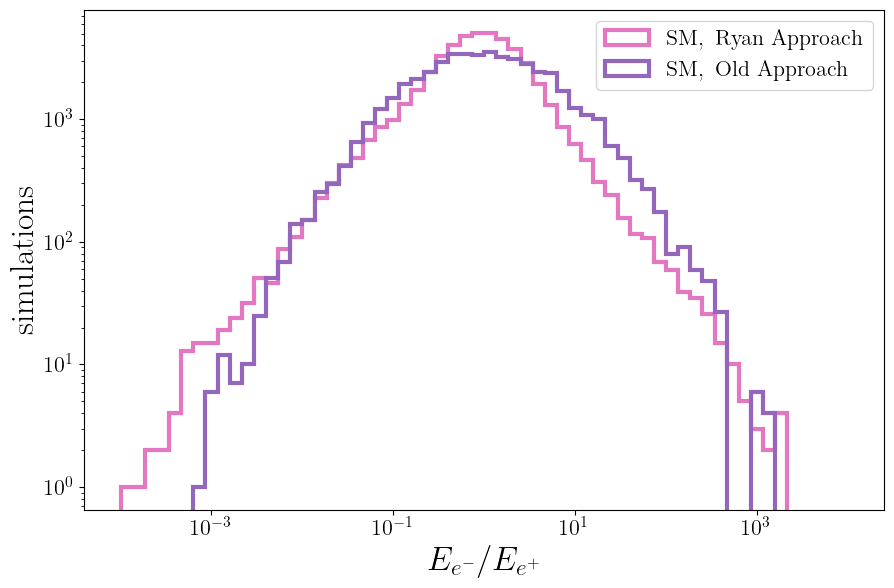

In [11]:
b0 = np.logspace(-4, 4, 61)

plt.hist(EsG/EsGP, bins=b0, histtype='step', lw=3, color='C6', density=False, ls='-', label=r"$\mathrm{SM,\ Ryan\ Approach}$")
plt.hist(EsGOld/EsGPOld, bins=b0, histtype='step', lw=3, color='C4', ls='-', density=False, label=r"$\mathrm{SM,\ Old\ Approach}$")

plt.gca().legend(loc=1, fontsize=16)
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
plt.gca().set_xlabel(r"$E_{e^-}/E_{e^+}$", fontsize=24)
plt.gca().set_ylabel(r"$\mathrm{simulations}$", fontsize=24)
#plt.gca().axis([1e-3,100,1e-11,1e-3])
[l.set_size(16) for l in plt.gca().get_xticklabels()]
[l.set_size(16) for l in plt.gca().get_yticklabels()]

set_size(8.0, 5.0)


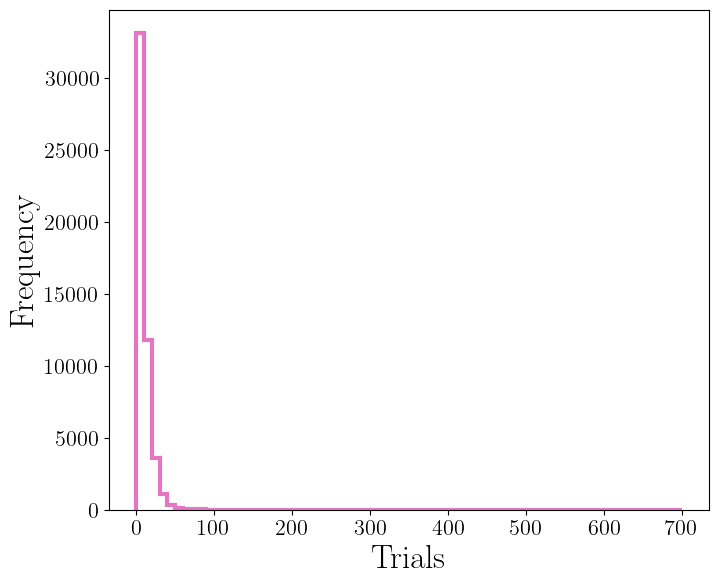

In [136]:
plt.hist(trials, bins=np.linspace(0,700,71), histtype='step', lw=3, color='C6', ls='-')

#plt.gca().legend(loc=1, fontsize=16)
#plt.gca().set_xscale('log')
#plt.gca().set_yscale('log')
plt.gca().set_xlabel(r"$\mathrm{Trials}$", fontsize=24)
plt.gca().set_ylabel(r"$\mathrm{Frequency}$", fontsize=24)
#plt.gca().axis([1e-3,100,1e-11,1e-3])
[l.set_size(16) for l in plt.gca().get_xticklabels()]
[l.set_size(16) for l in plt.gca().get_yticklabels()]

set_size(6.0, 5.0)


In [137]:
def slowShower():
    s0 = sGraphite.GenShower(11, p0.get_p0(), 22, VB=True)
    return

def fastShower():
    s0 = sGraphiteOld.GenShower(11, p0.get_p0(), 22, VB=True)
    return

In [138]:
profileSS = cProfile.Profile()
profileSS.runcall(slowShower)
psSS = pstats.Stats(profileSS)
psSS.print_stats()

Starting shower, initial particle with ID Info
[11.  1. 22.  0.  0. -1.  1.]
Initial four-momenta:
[1.         0.         0.         0.99999987]
         31428 function calls (31246 primitive calls) in 0.039 seconds

   Random listing order was used

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
     2071    0.000    0.000    0.000    0.000 {method 'append' of 'list' objects}
        6    0.000    0.000    0.000    0.000 {method 'bit_length' of 'int' objects}
      222    0.000    0.000    0.000    0.000 {method 'items' of 'dict' objects}
        2    0.000    0.000    0.000    0.000 {method 'update' of 'dict' objects}
        2    0.000    0.000    0.000    0.000 {method 'copy' of 'dict' objects}
        2    0.000    0.000    0.000    0.000 {method 'add' of 'set' objects}
        2    0.000    0.000    0.000    0.000 {method 'discard' of 'set' objects}
       11    0.000    0.000    0.000    0.000 {method 'split' of 'str' objects}
        2    0.000    0.000

/Users/kjkelly/Documents/miniforge3/envs/kjk/lib/python3.10/site-packages/PETITE/kinematics.py:21: RuntimeWarning: invalid value encountered in sqrt
  p, pp = np.sqrt(ep**2 - me**2), np.sqrt(epp**2 - me**2)
/Users/kjkelly/Documents/miniforge3/envs/kjk/lib/python3.10/site-packages/PETITE/kinematics.py:71: RuntimeWarning: invalid value encountered in sqrt
  pm, pp = np.sqrt(epm**2 - me**2), np.sqrt(epp**2 - me**2)


In [139]:
profileFS = cProfile.Profile()
profileFS.runcall(fastShower)
psFS = pstats.Stats(profileFS)
psFS.print_stats()

Starting shower, initial particle with ID Info
[11.  1. 22.  0.  0. -1.  1.]
Initial four-momenta:
[1.         0.         0.         0.99999987]
         4237 function calls (4196 primitive calls) in 0.004 seconds

   Random listing order was used

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       20    0.000    0.000    0.000    0.000 {method 'append' of 'list' objects}
       18    0.000    0.000    0.000    0.000 {method 'bit_length' of 'int' objects}
        6    0.000    0.000    0.000    0.000 {method 'items' of 'dict' objects}
        2    0.000    0.000    0.000    0.000 {method 'update' of 'dict' objects}
        2    0.000    0.000    0.000    0.000 {method 'copy' of 'dict' objects}
        2    0.000    0.000    0.000    0.000 {method 'add' of 'set' objects}
        2    0.000    0.000    0.000    0.000 {method 'discard' of 'set' objects}
       11    0.000    0.000    0.000    0.000 {method 'split' of 'str' objects}
        2    0.000    0.000  

More code to come when we're confident in other changes

In [140]:
SMS = sGraphite.GenShower(11, p0.get_p0(), 22, VB=True)

Starting shower, initial particle with ID Info
[11.  1. 22.  0.  0. -1.  1.]
Initial four-momenta:
[1.         0.         0.         0.99999987]


In [141]:
SMSOld = sGraphiteOld.GenShower(11, p0.get_p0(), 22, VB=True)

Starting shower, initial particle with ID Info
[11.  1. 22.  0.  0. -1.  1.]
Initial four-momenta:
[1.         0.         0.         0.99999987]


In [142]:
SMSPhotons = np.array(SMS)[np.where([ps.get_IDs()[0] == 22 for ps in SMS])[0]]
SMSOldPhotons = np.array(SMSOld)[np.where([ps.get_IDs()[0] == 22 for ps in SMSOld])[0]]

In [143]:
SMSElectrons = np.array(SMS)[np.where([ps.get_IDs()[0] == 11 for ps in SMS])[0]]
SMSOldElectrons = np.array(SMSOld)[np.where([ps.get_IDs()[0] == 11 for ps in SMSOld])[0]]

SMSPositrons = np.array(SMS)[np.where([ps.get_IDs()[0] == -11 for ps in SMS])[0]]
SMSOldPositrons = np.array(SMSOld)[np.where([ps.get_IDs()[0] == -11 for ps in SMSOld])[0]]

In [144]:
print(len(SMS), len(SMSOld))
print(len(SMSPhotons), len(SMSOldPhotons))
print(len(SMSElectrons), len(SMSOldElectrons))
print(len(SMSPositrons), len(SMSOldPositrons))

32 21
2 3
29 17
1 1


In [69]:
np.min([s0.get_pf()[0] for s0 in SMS])

0.10001473524065606

In [26]:
PhotonEs = np.array([s.get_p0()[0] for s in SMSPhotons])
PhotonEsOld = np.array([s.get_p0()[0] for s in SMSOldPhotons])

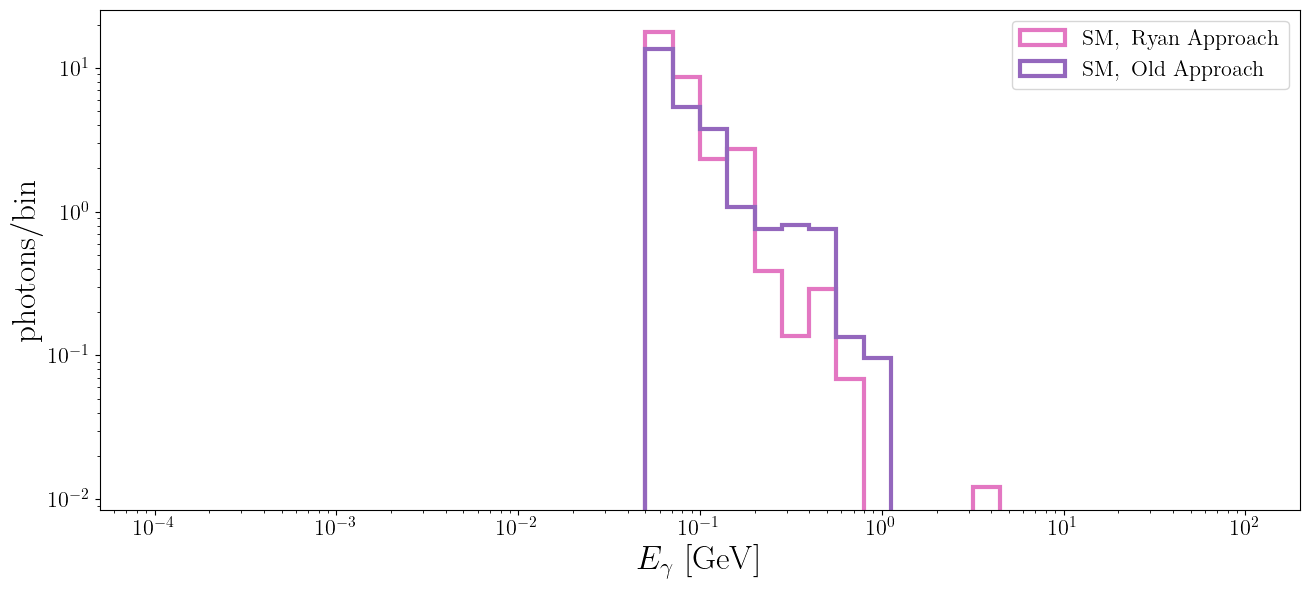

In [27]:
b0 = np.logspace(-4, 2, 41)

plt.hist(PhotonEs, bins=b0, histtype='step', lw=3, color='C6', density=True, ls='-', label=r"$\mathrm{SM,\ Ryan\ Approach}$")
plt.hist(PhotonEsOld, bins=b0, histtype='step', lw=3, color='C4', ls='-', density=True, label=r"$\mathrm{SM,\ Old\ Approach}$")

plt.gca().legend(loc=1, fontsize=16)
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
plt.gca().set_xlabel(r"$E_\gamma\ [\mathrm{GeV}]$", fontsize=24)
plt.gca().set_ylabel(r"$\mathrm{photons/bin}$", fontsize=24)
#plt.gca().axis([1e-3,100,1e-11,1e-3])
[l.set_size(16) for l in plt.gca().get_xticklabels()]
[l.set_size(16) for l in plt.gca().get_yticklabels()]

set_size(12.0, 5.0)


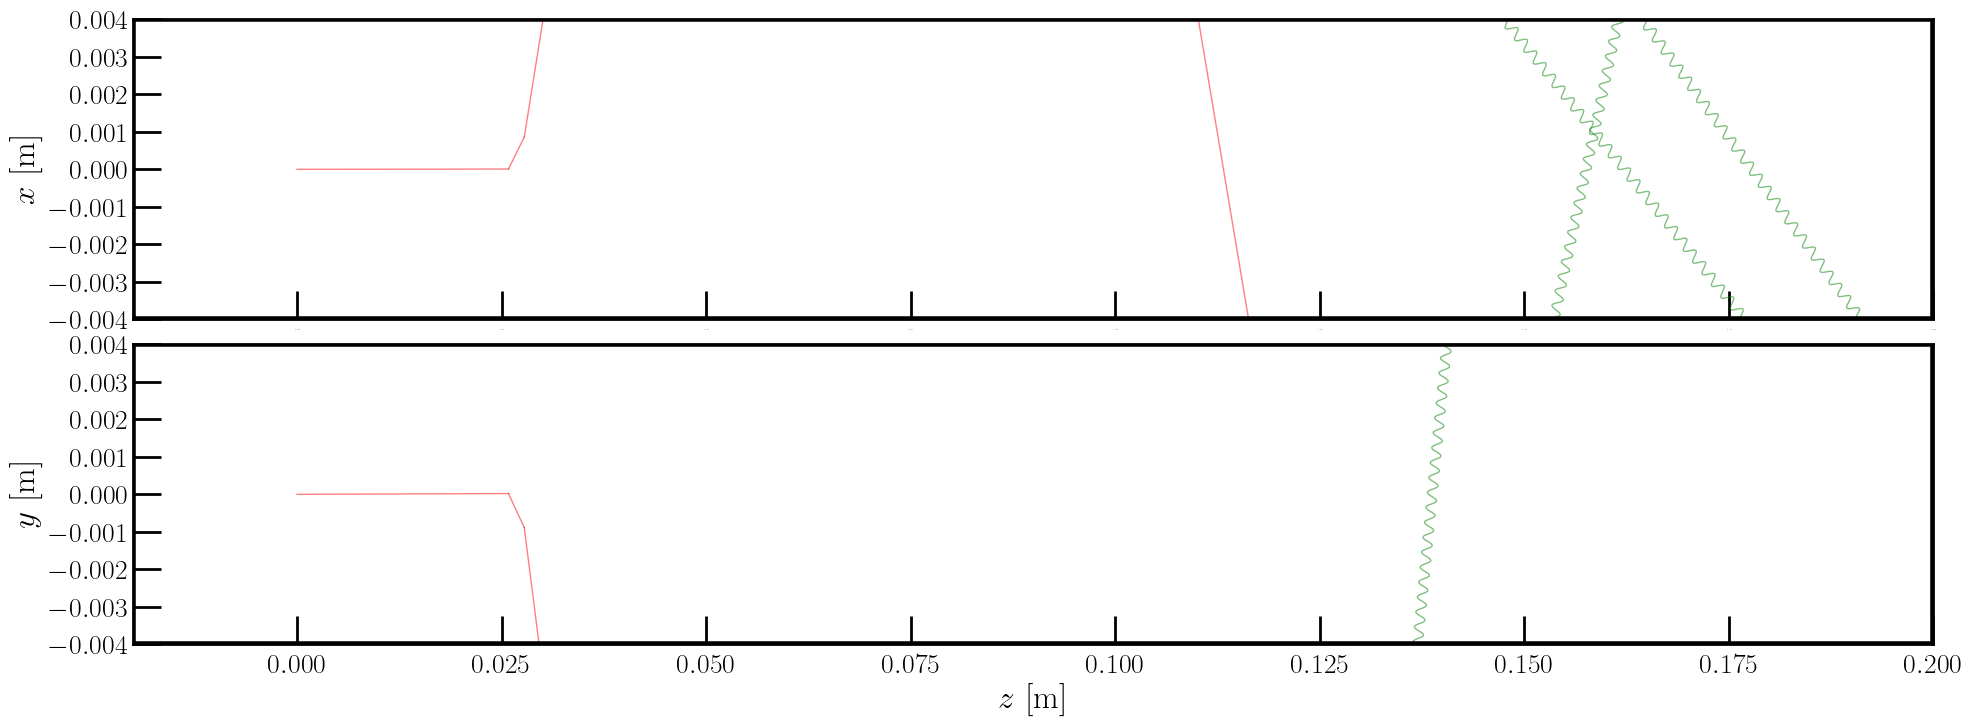

In [31]:
figwid = 6.0*3.0
fighei = 6.0*0.5
lside = 3.0
rside = 3.5
wwspace = 1.25

ncol = 1
nrow = 2

wid = lside + ncol*figwid + (ncol-1)*wwspace + rside

bot = 3.77
top = 3.5
hhspace = 0.25

hei = bot + nrow*fighei + (nrow-1)*hhspace + top

lfactor = lside/wid
rfactor = rside/wid
bfactor = bot/hei
tfactor = top/hei
wfactor = wwspace/figwid
hfactor = hhspace/fighei

matplotlib.rcParams['axes.linewidth'] = 2.0
fig, axes = plt.subplots(nrow, ncol, figsize=(wid, hei), facecolor='1.0');
fig.subplots_adjust(left = lfactor, bottom=bfactor, right=(1.0-rfactor), top=(1.0-tfactor), wspace=wfactor, hspace=hfactor);

xmin, xmax, ymin, ymax = -0.02, 0.2, -0.004, 0.004
#xmin, xmax, ymin, ymax = -1.0, 5.0, -0.4, 0.4

ax = axes[0]
ax.axis([xmin, xmax, ymin, ymax])
ax.plot([xmin, xmin, xmax, xmax, xmin], [ymin, ymax, ymax, ymin, ymin], ls='-', color='k', lw=4, zorder=50)
#ax.set_xlabel(r'$z\ [\mathrm{m}]$', fontproperties=font)        
ax.set_ylabel(r'$x\ [\mathrm{m}]$', fontproperties=font)        

ax.tick_params(direction='in', zorder=30, length=20, width=2)
ax.tick_params(direction='in', which='minor', zorder=30, length=15, width=1.5)
[l.set_position((0.5, -0.015)) for l in ax.get_xticklabels()]
[l.set_size((0)) for l in ax.get_xticklabels()]
[l.set_size((labelfont.get_size())) for l in ax.get_yticklabels()]

for ki0 in SMS:
    ki = np.concatenate([ki0.get_r0(), ki0.get_rf()])
    if ki0.get_IDs()[0] == 22:
        with matplotlib.rc_context({'path.sketch': (5, 15, 1)}):
            ax.plot([ki[2], ki[5]], [ki[0], ki[3]], lw=1, ls='-', color='g', alpha=0.5)
    if ki0.get_IDs()[0] == 11:
        ax.plot([ki[2], ki[5]], [ki[0], ki[3]], lw=1, ls='-', color='r', alpha=0.5)
    if ki0.get_IDs()[0] == -11:
        ax.plot([ki[2], ki[5]], [ki[0], ki[3]], lw=1, ls='-', color='b', alpha=0.5)

ax = axes[1]
ax.axis([xmin, xmax, ymin, ymax])
ax.plot([xmin, xmin, xmax, xmax, xmin], [ymin, ymax, ymax, ymin, ymin], ls='-', color='k', lw=4, zorder=50)
ax.set_xlabel(r'$z\ [\mathrm{m}]$', fontproperties=font)        
ax.set_ylabel(r'$y\ [\mathrm{m}]$', fontproperties=font)        

ax.tick_params(direction='in', zorder=30, length=20, width=2)
ax.tick_params(direction='in', which='minor', zorder=30, length=15, width=1.5)
[l.set_position((0.5, -0.015)) for l in ax.get_xticklabels()]
[l.set_size((labelfont.get_size())) for l in ax.get_xticklabels()]
[l.set_size((labelfont.get_size())) for l in ax.get_yticklabels()]

for ki0 in SMS:
    ki = np.concatenate([ki0.get_r0(), ki0.get_rf()])
    if ki0.get_IDs()[0] == 22:
        with matplotlib.rc_context({'path.sketch': (5, 15, 1)}):
            ax.plot([ki[2], ki[5]], [ki[1], ki[4]], lw=1, ls='-', color='g', alpha=0.5)
    if ki0.get_IDs()[0] == 11:
        ax.plot([ki[2], ki[5]], [ki[1], ki[4]], lw=1, ls='-', color='r', alpha=0.5)
    if ki0.get_IDs()[0] == -11:
        ax.plot([ki[2], ki[5]], [ki[1], ki[4]], lw=1, ls='-', color='b', alpha=0.5)

